In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"african_crises .csv")

In [3]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
df.shape

(1059, 14)

In [5]:
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [9]:
for i in df.columns:
    print(df[i].isnull().sum())
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [11]:
df.isna().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [19]:
df_numeric_cols = df[df.select_dtypes(exclude='object').columns.to_list()]
df_numeric_cols.sample(10)

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
579,40,1946,0,1.222800e+00,0,0,0.0,56.755229,0,0,1
954,69,2000,0,4.450000e+00,0,0,0.0,26.100000,1,1,1
241,15,1973,0,2.380000e+02,0,0,0.0,12.932574,1,0,0
96,2,1932,0,3.310000e-08,0,0,0.0,-2.247191,0,0,0
344,19,1921,0,2.343000e-01,0,0,0.0,-28.502137,1,0,0
196,10,1991,1,2.589998e+02,0,1,0.0,-2.848000,1,0,0
338,19,1915,0,2.060000e-01,0,0,0.0,-16.000606,1,0,0
1051,70,2006,1,3.000000e-19,1,1,0.0,1281.113605,1,1,1
428,19,2005,0,5.732200e+00,0,0,0.0,8.826000,1,0,0
950,69,1996,1,1.287000e+00,0,0,0.0,43.095000,1,1,1


In [20]:
df_categorical_cols = df[df.select_dtypes(include='object').columns.to_list()]
df_categorical_cols.sample(10)

,cc3,country,banking_crisis
1024,ZWE,Zimbabwe,no_crisis
931,ZMB,Zambia,no_crisis
1010,ZWE,Zimbabwe,no_crisis
145,AGO,Angola,crisis
617,MAR,Morocco,crisis
64,DZA,Algeria,no_crisis
590,MAR,Morocco,no_crisis
514,MUS,Mauritius,no_crisis
575,MAR,Morocco,no_crisis
710,ZAF,South Africa,no_crisis


In [31]:
df.groupby('country')['banking_crisis'].value_counts()

country                   banking_crisis
Algeria                   no_crisis          81
                          crisis              4
Angola                    no_crisis          70
                          crisis              7
Central African Republic  no_crisis          39
                          crisis             19
Egypt                     no_crisis         144
                          crisis             11
Ivory Coast               no_crisis          59
                          crisis              4
Kenya                     no_crisis          59
                          crisis              8
Mauritius                 no_crisis          67
                          crisis              1
Morocco                   no_crisis          73
                          crisis              2
Nigeria                   no_crisis          49
                          crisis             11
South Africa              no_crisis         111
                          crisis              3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Ivory Coast'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Morocco'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Tunisia'),
  Text(11, 0, 'Zambia'),
  Text(12, 0, 'Zimbabwe')])

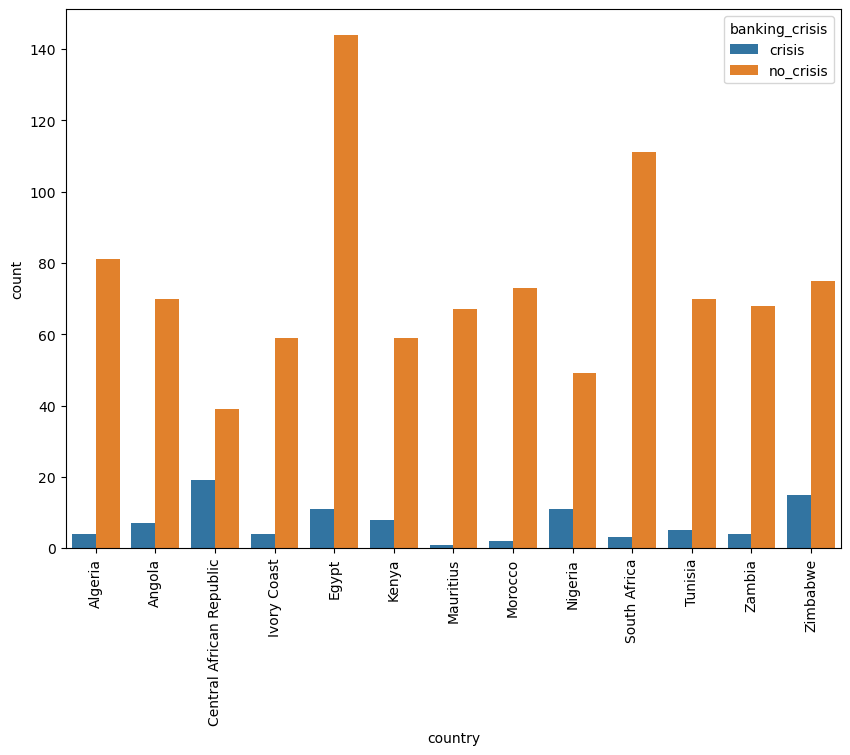

In [65]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='country',hue='banking_crisis',width=0.8)
plt.xticks(rotation=90)

<Axes: >

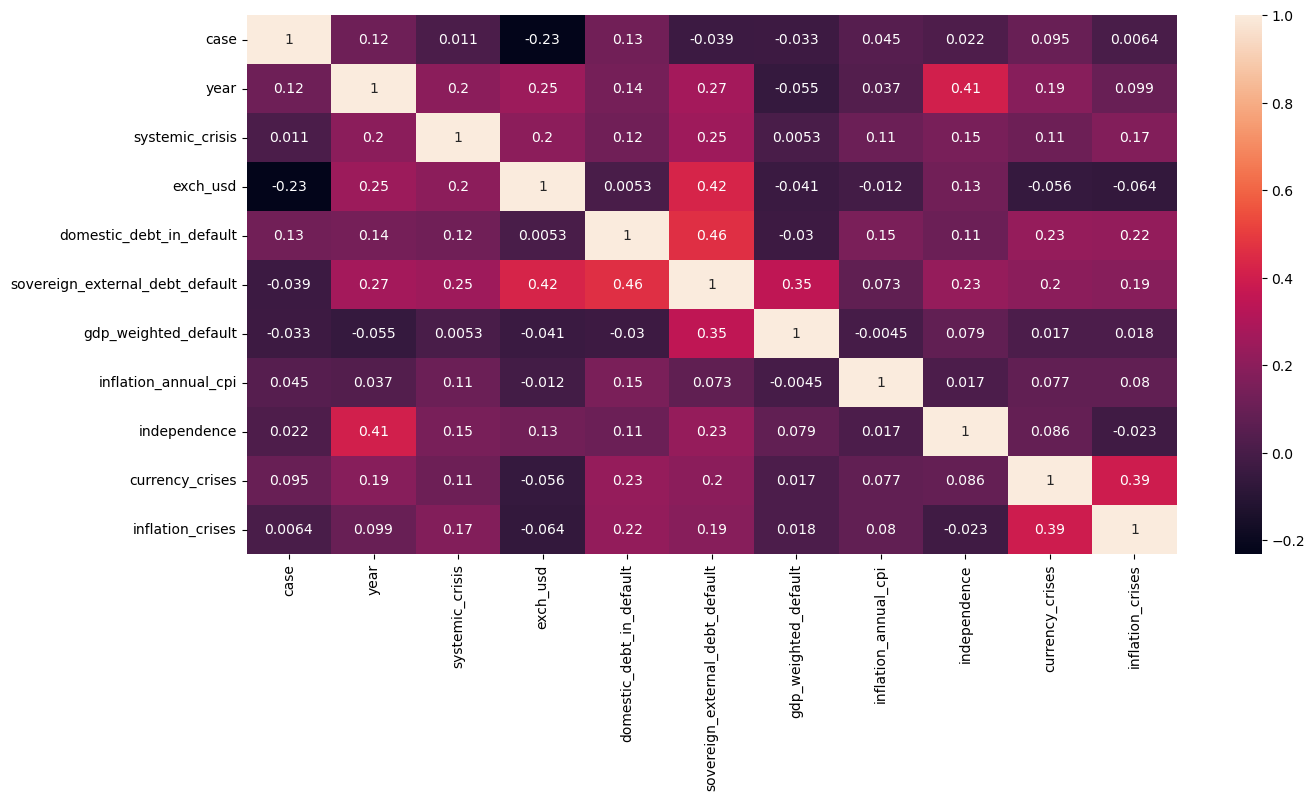

In [67]:
plt.figure(figsize=(15,7))
num_corr = df_numeric_cols.corr(numeric_only=True)
sns.heatmap(num_corr, annot=True)

In [74]:
df.groupby('country')['systemic_crisis'].value_counts()

country                   systemic_crisis
Algeria                   0                   81
                          1                    4
Angola                    0                   77
Central African Republic  0                   39
                          1                   19
Egypt                     0                  149
                          1                    6
Ivory Coast               0                   59
                          1                    4
Kenya                     0                   54
                          1                   13
Mauritius                 0                   68
Morocco                   0                   73
                          1                    2
Nigeria                   0                   50
                          1                   10
South Africa              0                  114
Tunisia                   0                   70
                          1                    5
Zambia                    0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Algeria'),
  Text(1, 0, 'Angola'),
  Text(2, 0, 'Central African Republic'),
  Text(3, 0, 'Ivory Coast'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Morocco'),
  Text(8, 0, 'Nigeria'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Tunisia'),
  Text(11, 0, 'Zambia'),
  Text(12, 0, 'Zimbabwe')])

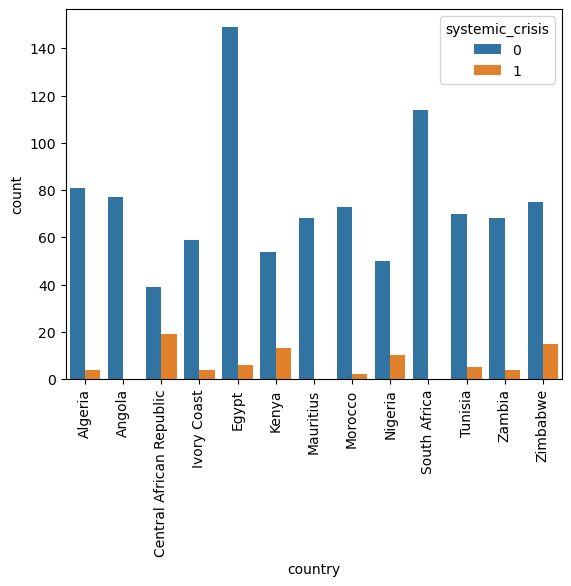

In [69]:
sns.countplot(data=df, x='country', hue='systemic_crisis')
plt.xticks(rotation=90)

In [114]:
new_df = df.groupby('country')['systemic_crisis'].value_counts().reset_index()
new_df

,country,systemic_crisis,count
0,Algeria,0,81
1,Algeria,1,4
2,Angola,0,77
3,Central African Republic,0,39
4,Central African Republic,1,19
5,Egypt,0,149
6,Egypt,1,6
7,Ivory Coast,0,59
8,Ivory Coast,1,4
9,Kenya,0,54


In [116]:
new_df = new_df[new_df['systemic_crisis'] == 1]
new_df

,country,systemic_crisis,count
1,Algeria,1,4
4,Central African Republic,1,19
6,Egypt,1,6
8,Ivory Coast,1,4
10,Kenya,1,13
13,Morocco,1,2
15,Nigeria,1,10
18,Tunisia,1,5
20,Zambia,1,4
22,Zimbabwe,1,15


In [117]:
data = []
for i in new_df['count']:
    a = (i/new_df['count'].sum())*100
    data.append(round(a,2))
print(data)
#new_df['count'].sum()

[4.88, 23.17, 7.32, 4.88, 15.85, 2.44, 12.2, 6.1, 4.88, 18.29]


In [118]:
new_df['freq'] = data

In [119]:
new_df

,country,systemic_crisis,count,freq
1,Algeria,1,4,4.88
4,Central African Republic,1,19,23.17
6,Egypt,1,6,7.32
8,Ivory Coast,1,4,4.88
10,Kenya,1,13,15.85
13,Morocco,1,2,2.44
15,Nigeria,1,10,12.20
18,Tunisia,1,5,6.10
20,Zambia,1,4,4.88
22,Zimbabwe,1,15,18.29


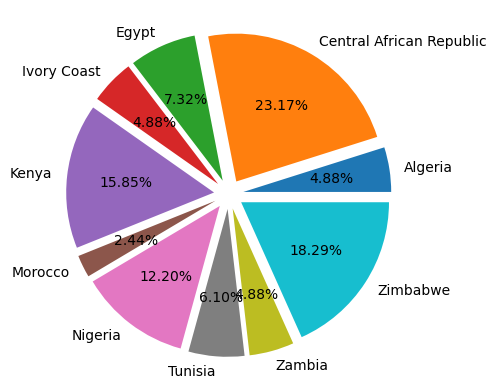

In [127]:
plt.pie(x=new_df['freq'].values,autopct='%0.2f%%',labels=new_df['country'].value_counts().keys(),explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()

In [132]:
new_df2 = df.groupby('country')['banking_crisis'].value_counts().reset_index()
new_df2 = new_df2[new_df2['banking_crisis'] == 'crisis']
new_df2

,country,banking_crisis,count
1,Algeria,crisis,4
3,Angola,crisis,7
5,Central African Republic,crisis,19
7,Egypt,crisis,11
9,Ivory Coast,crisis,4
11,Kenya,crisis,8
13,Mauritius,crisis,1
15,Morocco,crisis,2
17,Nigeria,crisis,11
19,South Africa,crisis,3


In [133]:
new_df2 = df[df['banking_crisis'] == 'crisis'].groupby('country')['banking_crisis'].count().reset_index()


In [134]:
new_df2

,country,banking_crisis
0,Algeria,4
1,Angola,7
2,Central African Republic,19
3,Egypt,11
4,Ivory Coast,4
5,Kenya,8
6,Mauritius,1
7,Morocco,2
8,Nigeria,11
9,South Africa,3


In [135]:
data = []
for i in new_df2['banking_crisis']:
    a = (i/new_df2['banking_crisis'].sum())*100
    data.append(round(a,2))
print(data)

[4.26, 7.45, 20.21, 11.7, 4.26, 8.51, 1.06, 2.13, 11.7, 3.19, 5.32, 4.26, 15.96]


In [138]:
new_df2['banking_crisis_freq'] = data


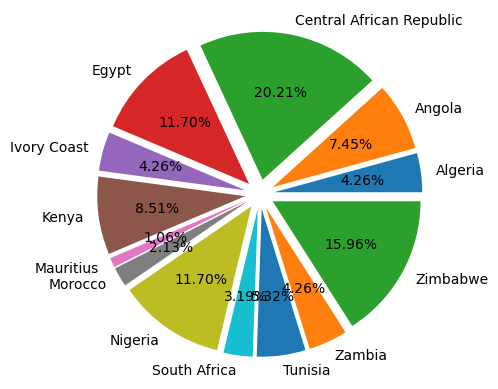

In [141]:
plt.pie(x=new_df2['banking_crisis_freq'].values,autopct='%0.2f%%',labels=new_df2['country'].value_counts().keys(),explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.show()